Link for Dataset ---> https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

### Importing libraries

In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import linalg
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report,confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [2]:
df = pd.read_csv(r'C:/Users/User/Desktop/vascular.csv',sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data exploration/cleaning

Age is in days ,let's transform it to years

In [3]:
df['age'] = df["age"]//365

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Checking for Missing Values

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No null values

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Checking the balance of the data

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

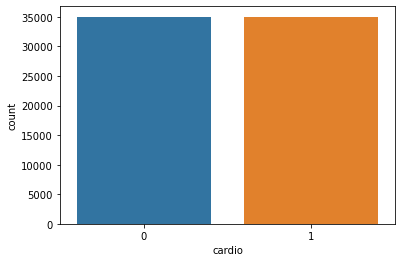

In [7]:
sns.countplot(df["cardio"])

We have balanced output classes wich is good 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

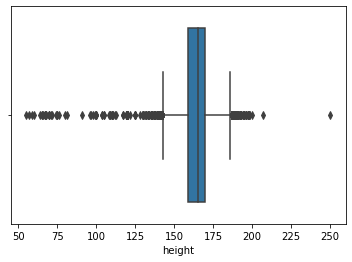

In [8]:
sns.boxplot(df["height"]) #It seems like we a lot of outliers especially on the left side

Lets check the distribution


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

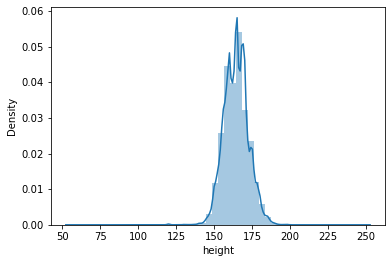

In [9]:
sns.distplot(df["height"]) 

Distribution is widely distributed


<AxesSubplot:xlabel='weight', ylabel='height'>

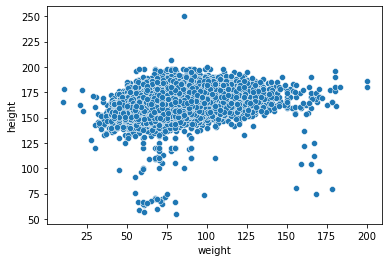

In [10]:
sns.scatterplot(x=df["weight"],y=df["height"])

The weight of people who's height is less than ~135 is between 25 and 180 kg wich is not normal .Let's do some more plotting.

<AxesSubplot:xlabel='age', ylabel='height'>

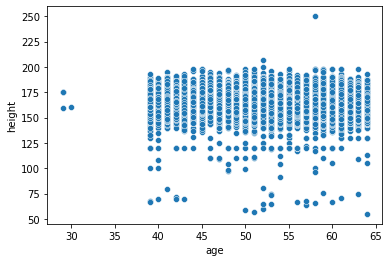

In [11]:
sns.scatterplot(x=df["age"],y=df["height"])


There is definitly some thing wrong with the height because age's are more than 40 years old.

Removing outliers outside the (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR) range for widely distributed data

In [14]:
Q1=df["height"].quantile(0.25).round().astype('int')
Q3=df["height"].quantile(0.75).round().astype('int')
IQR = Q3-Q1
low_bound = (Q1 - 1.5 * IQR)
up_bound = (Q3 + 1.5 * IQR)
df.drop(df[(df["height"]>up_bound) | (df["height"]<low_bound)].index,inplace=True)

In [15]:
df.drop(df[(df["height"]>up_bound) | (df["height"]<low_bound)].index,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

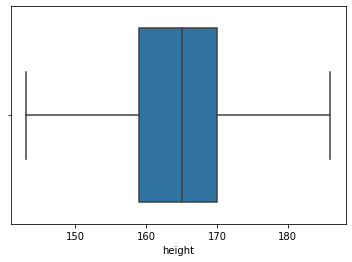

In [16]:
sns.boxplot(df["height"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

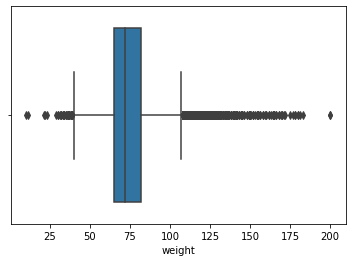

In [17]:
sns.boxplot(df["weight"])

We have lots of outlier especially to the right

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

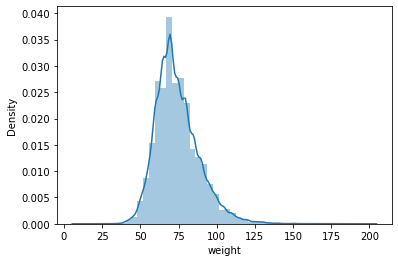

In [18]:
sns.distplot(df["weight"])

Doing the same as we did with the height feature

In [21]:
Q1=df["weight"].quantile(0.25)
Q3=df["weight"].quantile(0.75)
IQR = Q3-Q1
low_bound = (Q1 - 1.5 * IQR)
up_bound = (Q3 + 1.5 * IQR)

In [22]:
df.drop(df[(df["weight"]>up_bound) | (df["weight"]<low_bound)].index,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

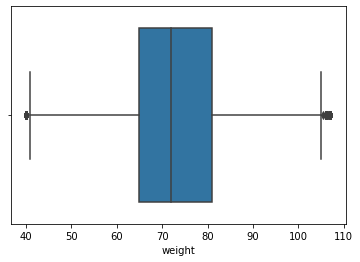

In [23]:
sns.boxplot(df["weight"])

We still have some outliers but its not a problem

ap_hi and ap_lo cannot be negative

In [24]:
df=df[df["ap_hi"]>0]

In [25]:
df=df[df["ap_lo"]>0]

In [26]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000,67694.000000
mean,49954.399134,52.839690,1.346161,164.310131,73.061872,128.545395,96.027063,1.360002,1.221083,0.086773,0.052782,0.804517,0.494623
std,28862.630374,6.768001,0.475749,7.565683,12.406249,156.368743,189.143090,0.674979,0.566853,0.281504,0.223599,0.396575,0.499975
min,0.000000,29.000000,1.000000,143.000000,40.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24959.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49991.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74861.500000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
min_val,max_val = df.ap_hi.quantile([0.001,0.999]) 
min_val,max_val

(12.0, 210.0)

Removing extreme values for ap_hi

In [28]:
df.drop(df[(df["ap_hi"]>max_val) | (df["ap_hi"]<min_val)].index,inplace=True)

In [29]:
min_val,max_val = df.ap_lo.quantile([0.001,0.999]) 
min_val,max_val

(50.0, 1100.0)

Same for ap_lo

In [30]:
df.drop(df[(df["ap_lo"]>max_val) | (df["ap_lo"]<min_val)].index,inplace=True)

0.25495338256602673


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


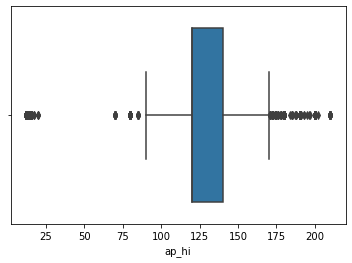

In [31]:
sns.boxplot(df["ap_hi"])
print(df.ap_hi.skew())
# The skewness here is not that high

In [32]:
df.drop(df[(df["ap_hi"]>df["ap_hi"].quantile(0.975)) | (df["ap_hi"]<df["ap_hi"].quantile(0.025))].index,inplace=True)

9.716574335013364


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


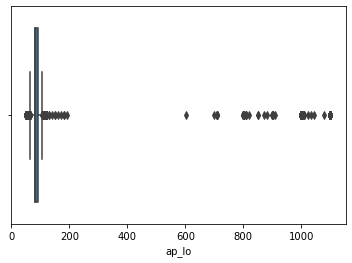

In [33]:
sns.boxplot(df["ap_lo"])
print(df["ap_lo"].skew())

In [34]:
Q1=df["ap_lo"].quantile(0.25)
Q3=df["ap_lo"].quantile(0.75)
IQR = Q3-Q1
low_bound = (Q1 - 1.5 * IQR)
up_bound = (Q3 + 1.5 * IQR)

In [35]:
df.drop(df[(df["ap_lo"]>up_bound) | (df["ap_lo"]<low_bound)].index,inplace=True)

In [36]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000,61766.000000
mean,49958.687352,52.897095,1.348638,164.420102,73.152958,126.131869,81.628372,1.355633,1.220299,0.086326,0.051922,0.804294,0.491468
std,28864.565204,6.741252,0.476543,7.526172,12.243491,13.640097,7.577346,0.673926,0.567637,0.280847,0.221871,0.396747,0.499931
min,0.000000,29.000000,1.000000,143.000000,40.000000,100.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24889.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50011.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74890.750000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,160.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


As we researched, Substracting Diastolic blood pressure from Systolic blood pressure gives Pulse Pressure that can't be negative
Therefore, ap_hi > ap_lo

In [37]:
print('There are total {} observations where ap_hi < ap_lo'.format(len(df[df['ap_hi'] < df['ap_lo']])))

df = df[df['ap_hi'] >= df['ap_lo']].reset_index(drop=True)

There are total 0 observations where ap_hi < ap_lo


In [38]:
df.drop_duplicates(inplace=True)   #dropping duplicates


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61766 entries, 0 to 61765
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61766 non-null  int64  
 1   age          61766 non-null  int64  
 2   gender       61766 non-null  int64  
 3   height       61766 non-null  int64  
 4   weight       61766 non-null  float64
 5   ap_hi        61766 non-null  int64  
 6   ap_lo        61766 non-null  int64  
 7   cholesterol  61766 non-null  int64  
 8   gluc         61766 non-null  int64  
 9   smoke        61766 non-null  int64  
 10  alco         61766 non-null  int64  
 11  active       61766 non-null  int64  
 12  cardio       61766 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.6 MB


## Data visualisation

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


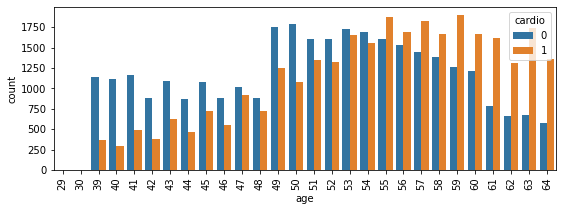

In [40]:
plt.figure(figsize=(9, 3))
sns.countplot(df["age"],hue=df["cardio"])
plt.xticks(rotation=90);

We can observe that people above 55 years old are more exposed to cardiovascular disease than under 55 years old.

<AxesSubplot:xlabel='height'>

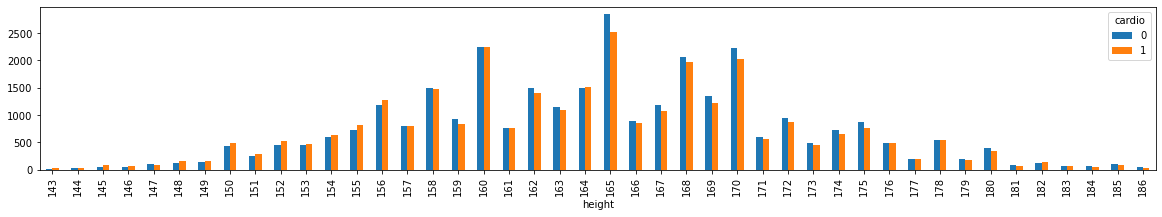

In [41]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.height,df.cardio).plot(kind='bar')

We can't conclude anything from the height

<AxesSubplot:xlabel='weight'>

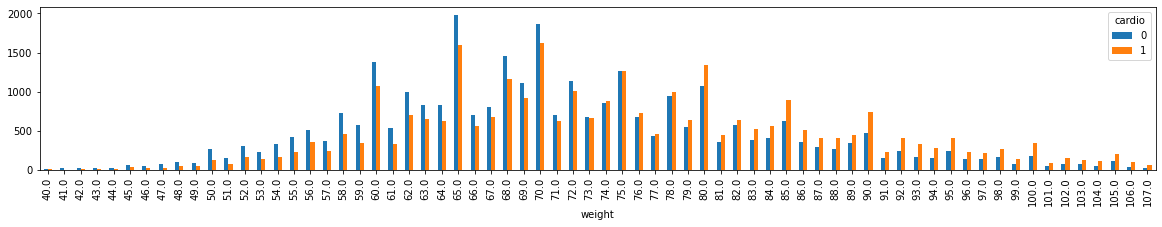

In [42]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.weight.round(),df.cardio).plot(kind='bar')

Records with high weight values are more exposed to cardiovascular disease compared to low weight values.We can create a new feature that is a function of "height" and "weight" that is called Body Mass Index (BMI)

In [40]:
df["BMI"] = df["weight"]/((df["height"]/100)**2)

<AxesSubplot:xlabel='BMI'>

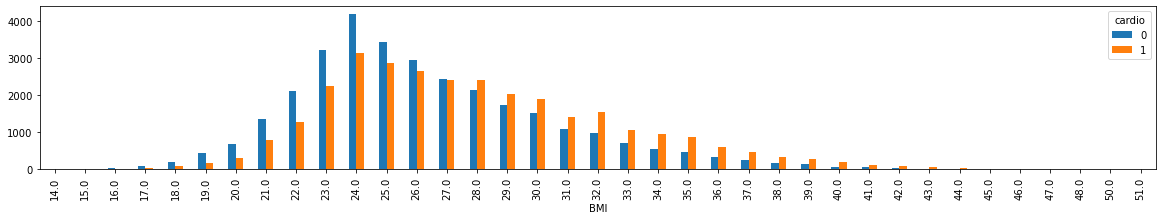

In [44]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.BMI.round(),df.cardio).plot(kind='bar')

Now we can see clearly that records with low BMI are less exposed to cardiovascular disease than those with higher BMI

<AxesSubplot:xlabel='ap_hi'>

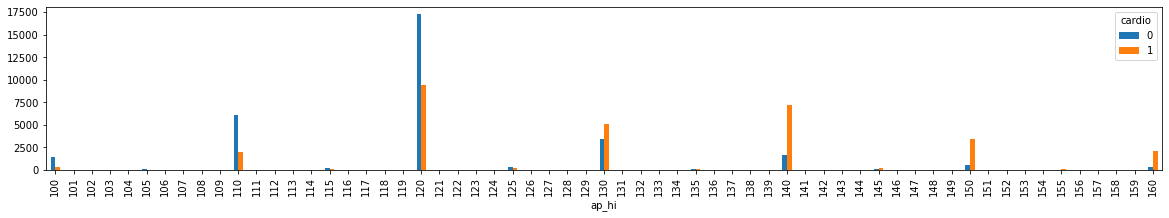

In [45]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.ap_hi,df.cardio).plot(kind='bar')

<AxesSubplot:xlabel='ap_lo'>

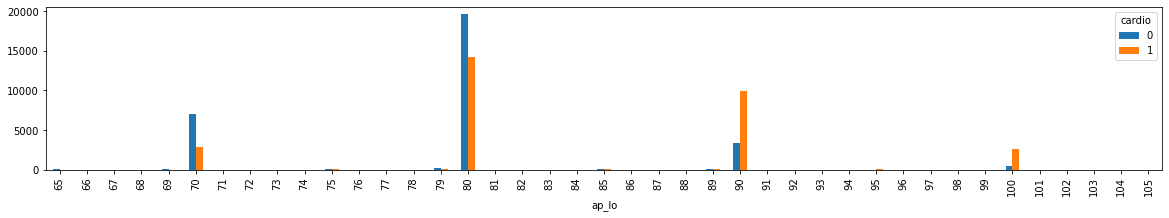

In [46]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.ap_lo,df.cardio).plot(kind='bar')

We can observe that people with low ap_hi and ap_lo are less exposed to cardiovascular disease than people with high ap_hi and ap_lo.

<AxesSubplot:xlabel='cholesterol'>

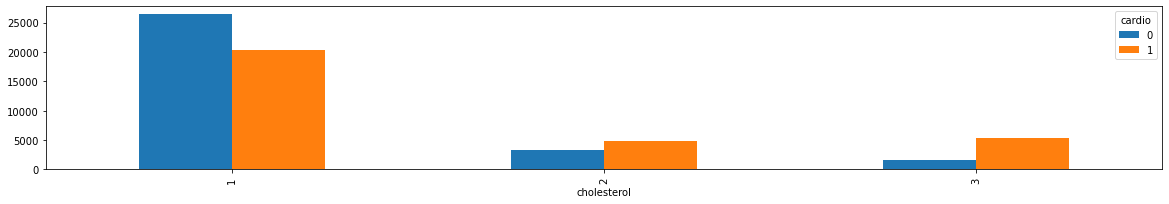

In [47]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.cholesterol,df.cardio).plot(kind='bar')

We can observe that people with low cholesterol are less exposed to cardiovascular disease than people with high cholesterol

<AxesSubplot:xlabel='gluc'>

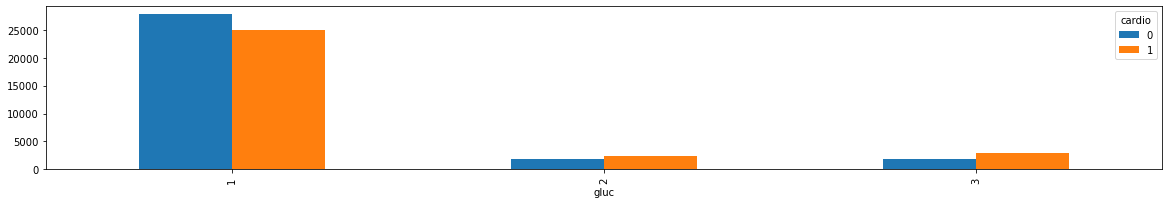

In [48]:
plt.rcParams['figure.figsize']=20,3
pd.crosstab(df.gluc,df.cardio).plot(kind='bar')

We can observe that people with low glucose are less exposed to cardiovascular disease than people with high glucose.

#### count plot for smoke/active/alco

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoke', ylabel='count'>

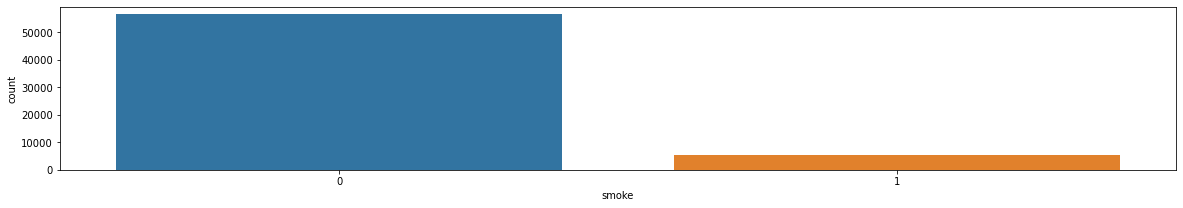

In [49]:
sns.countplot(df["smoke"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alco', ylabel='count'>

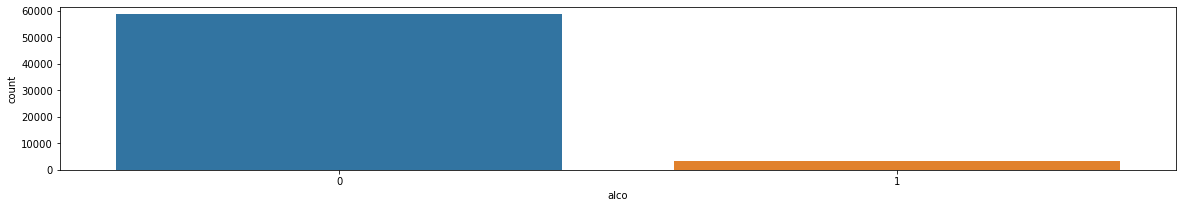

In [50]:
sns.countplot(df["alco"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active', ylabel='count'>

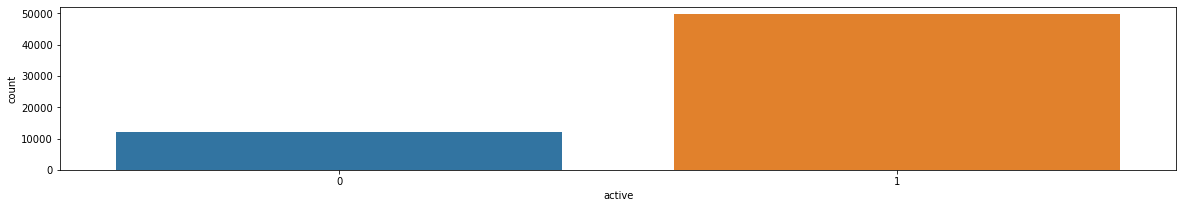

In [51]:
sns.countplot(df["active"])

In [41]:
df["gender"] = df["gender"]-1

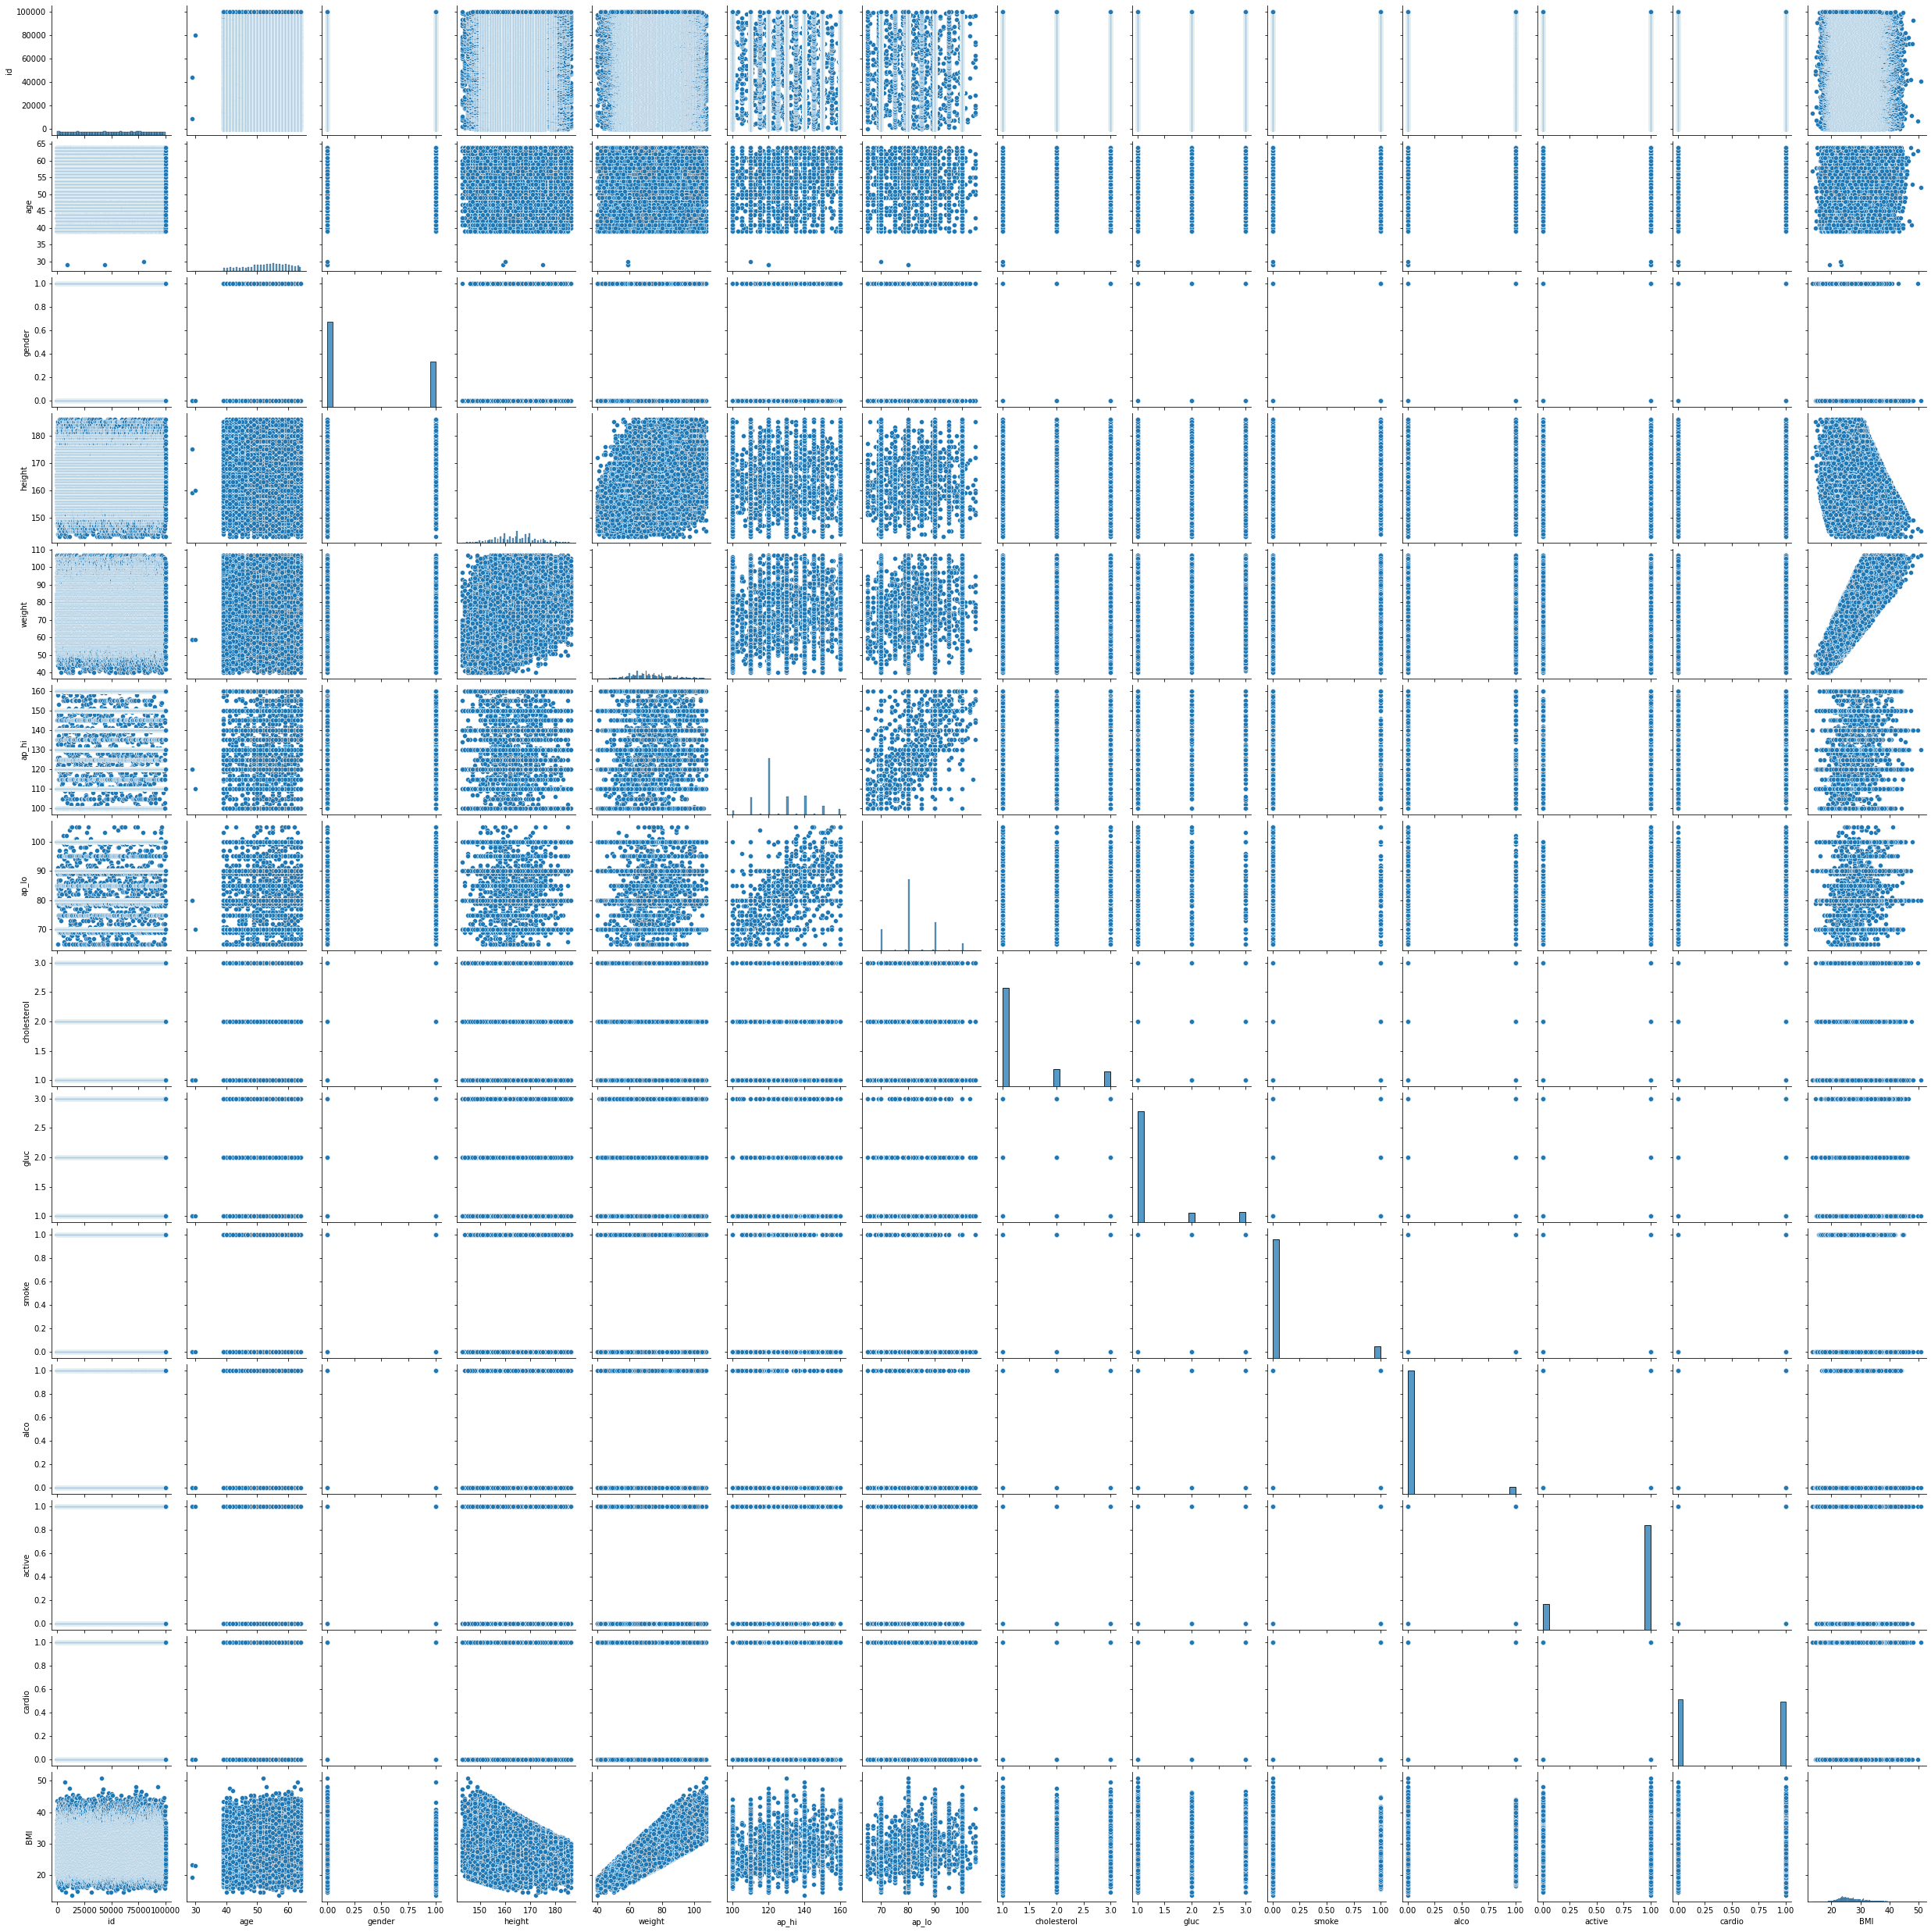

In [42]:
sns.pairplot(df)

## Feature selection

 Based on previous visualization we can say that BMI,ap_hi,ap_lo,cholesterol,gluc are important features.

 Correlation matrix

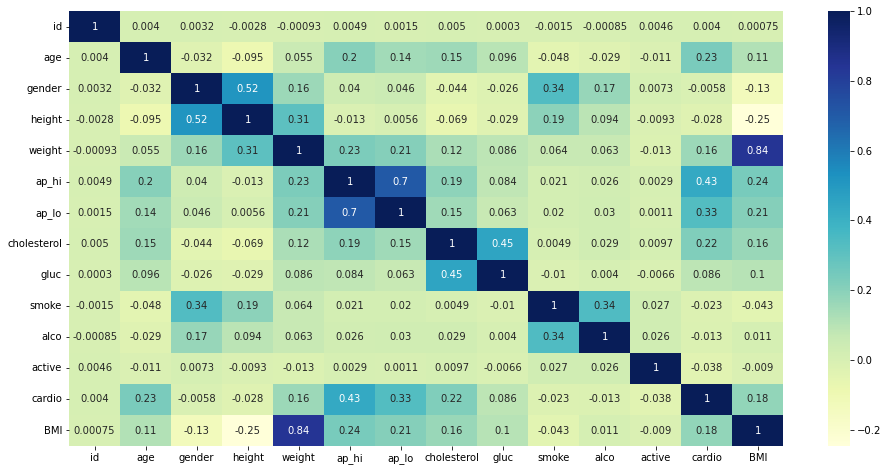

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )  
plt.show()

We won't choose weight to prevent multicolliearity with BMI .
We will also drop unbalanced and irrelevant features such as smoke,alco,active,height,id.


ap_hi and ap_lo are highly positively correlated with each other.We can choose one of them.

In [54]:
df=df.drop(df[["height","id","gender","gluc","smoke","alco","active",]],axis=1)

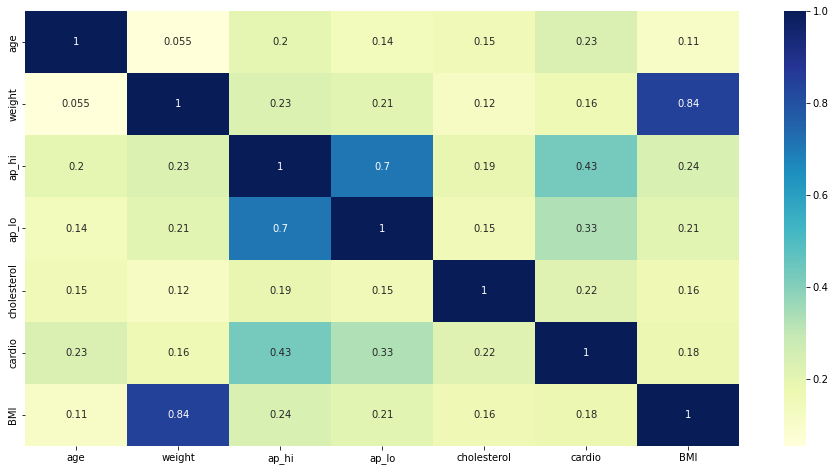

In [55]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )  
plt.show()

We can use selectKbest and chi2 to check best features with cardio.

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
x = df.drop(df[["cardio"]],axis=1)
y=df["cardio"]

In [58]:
best_feat = SelectKBest(score_func=chi2,k=6)
fit = best_feat.fit(x,y)

In [59]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumn=pd.DataFrame(x.columns)

In [60]:
featurescore = pd.concat([dfcolumn,dfscore],axis=1)
featurescore.columns=['specs','scores']

In [123]:
print(featurescore.nlargest(6,'scores'))

         specs        scores
2        ap_hi  16928.333904
3        ap_lo   4769.344641
1       weight   3220.868122
0          age   2922.097095
5          BMI   1485.869565
4  cholesterol    982.079410


The heighest scores are the best so between ap_hi ,ap_lo  we will choose ap_hi and between weight and BMI we will choose weight.



So our new X is ap_hi ,  weight ,  age  and cholesterol.

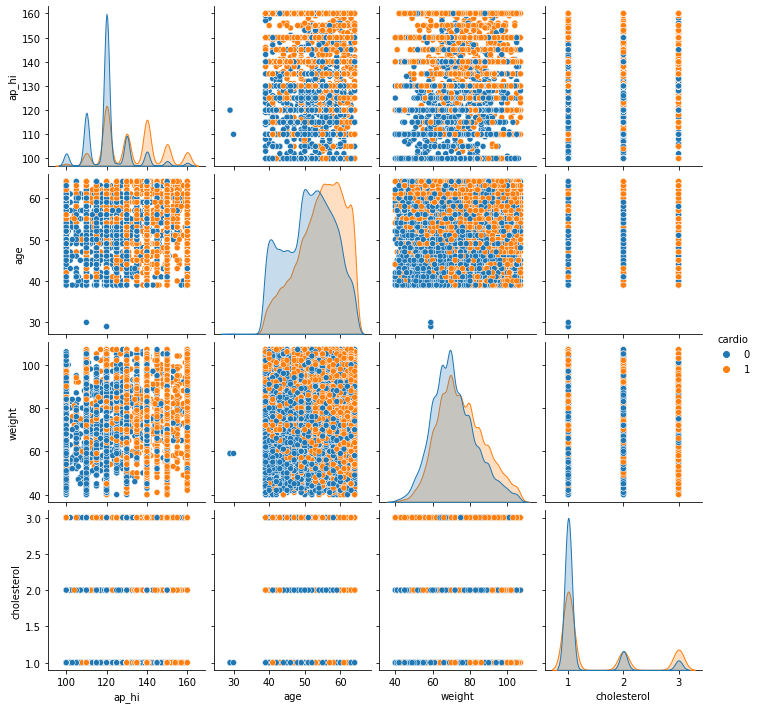

In [62]:
sns.pairplot(df[['ap_hi',"age","weight","cholesterol","cardio"]],hue="cardio")

We still have some outliers lets remove age lower than 35

In [63]:
df = df[df["age"]>35]

## Model selection

We are going to train this dataset over few models and compare them for our best use.

In [64]:
X = df[['ap_hi',"age","weight","cholesterol"]]   
Y = df['cardio']

Spliting our data

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

Scaling our data

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

### Model without hyper parameter tuning.

In [67]:
classifiers = {
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
    'K-Nearest Neighbors' : KNeighborsClassifier(), 
    'Decision Tree' : DecisionTreeClassifier(), 
    'XGBoost' : XGBClassifier()
}

In [68]:
#2 mins to run
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score', 
                                'False_Negative', 'True_Positive'])

for key, value in classifiers.items():
    #fit models
    value.fit(X_train, y_train)
    train_pred = value.predict(X_train)
    y_pred = value.predict(X_test)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # add measurements to dataframe
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

In [69]:
results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)


,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
XGBoost,74.12,72.42,0.71,1957.0,4108.0
Support Vector Machine,72.33,72.40,0.71,1937.0,4128.0
Logistic Regression,71.76,72.12,0.70,2110.0,3955.0
K-Nearest Neighbors,74.65,69.22,0.68,1966.0,4099.0
Random Forest,79.98,68.83,0.67,2192.0,3873.0
Decision Tree,79.98,67.13,0.63,2589.0,3476.0


Best model without hyper parameter tuning is support vector machines since it has highest f1 score,lowest false negative and highest true positive.

## Hyper parameter tuning

We are going to perform some hyperparamters tuning using gridsearch and randomsearch.

In [70]:
def get_results(model, model_name):
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
     # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

we will use scoring="f1" in the grid/randomized search to get a balance between false negative and false positives.

In [71]:
RF = RandomForestClassifier()
param_grid_RF = {
    'n_estimators' : [30,40,50],
    'max_depth' : [30,40,50], 
    'min_samples_split' : [2,1,3,4], 
    'min_samples_leaf' : [5,6,7,8,9]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 15,cv=5,scoring= 'f1', 
                           random_state= 42)


In [72]:
RS_RF.fit(X_train, y_train)
RS_RF.best_params_

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_depth': 30}

RS Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6288
           1       0.73      0.68      0.70      6065

    accuracy                           0.72     12353
   macro avg       0.72      0.72      0.72     12353
weighted avg       0.72      0.72      0.72     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


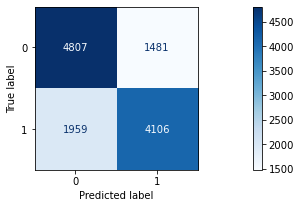

In [73]:
get_results(RS_RF, 'RS Random Forest')

In [127]:
# Instantiate classifier
KNN = KNeighborsClassifier()

param_grid_KNN = {
    'n_neighbors' : [80,96,100,110,130,170,200,250,280,300], 
    'weights' : ['uniform', 'distance']
}

# Instantiate Grid Search
GS_KNN = GridSearchCV(KNN, param_grid_KNN, n_jobs= 3,cv=5 ,scoring= 'f1')

In [128]:
# fit model
GS_KNN.fit(X_train, y_train)
GS_KNN.best_params_

{'n_neighbors': 280, 'weights': 'uniform'}

GS KNN Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6288
           1       0.74      0.67      0.71      6065

    accuracy                           0.73     12353
   macro avg       0.73      0.73      0.73     12353
weighted avg       0.73      0.73      0.73     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


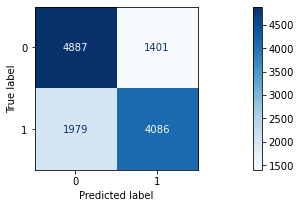

In [129]:
get_results(GS_KNN, 'GS KNN')

In [101]:
# Instantiate classifier
DT = DecisionTreeClassifier()

param_grid_DT = {
    'max_depth' : [3, 4, 5,6], 
    'min_samples_split' : [0.02,0.03,0.04, 0.05,0.06], 
    'min_samples_leaf' : [6,7,8,9,10,11] 
}

# Instantiate Randomized Search
RS_DT = RandomizedSearchCV(DT, param_grid_DT,cv=5, n_jobs= 3,scoring="f1",random_state=42)

RS_DT.fit(X_train, y_train)
RS_DT.best_params_

{'min_samples_split': 0.06, 'min_samples_leaf': 8, 'max_depth': 4}

RS Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6288
           1       0.72      0.72      0.72      6065

    accuracy                           0.73     12353
   macro avg       0.72      0.72      0.72     12353
weighted avg       0.73      0.73      0.73     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


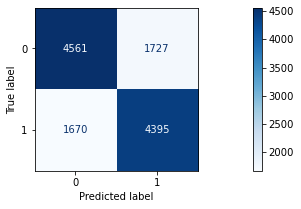

In [102]:
get_results(RS_DT, 'RS Decision Tree')

In [81]:
# Instantiate classifier
LG = LogisticRegression()

param_grid_LG = {
    'penalty': ['l1', 'l2','elasticnet'] ,
    'C':[0.0008,0.0005,0.001,0.002],  
    'random_state' : [42]
}
# Instantiate Grid Search
GS_LG = GridSearchCV(LG, param_grid_LG,cv=5, scoring= 'f1')
# fit model
GS_LG.fit(X_train, y_train)
GS_LG.best_params_

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

{'C': 0.002, 'penalty': 'l2', 'random_state': 42}

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


GS Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6288
           1       0.75      0.65      0.70      6065

    accuracy                           0.72     12353
   macro avg       0.72      0.72      0.72     12353
weighted avg       0.72      0.72      0.72     12353



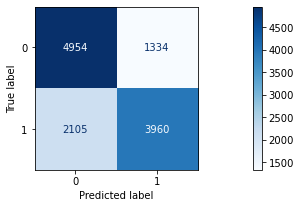

In [82]:
get_results(GS_LG, 'GS Logistic Regression')

In [118]:
# Instantiate classifier
svc = SVC(class_weight = {1: 1.5}, random_state= 42)
svc.fit(X_train, y_train)

SVC(class_weight={1: 1.5}, random_state=42)

Tuned SVM Classification Report
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      6288
           1       0.68      0.78      0.73      6065

    accuracy                           0.72     12353
   macro avg       0.72      0.72      0.71     12353
weighted avg       0.72      0.72      0.71     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


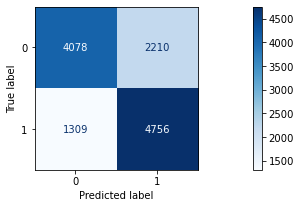

In [119]:
get_results(svc, 'Tuned SVM')

In [83]:
# Instantiate classifier
xgb = XGBClassifier()
param_grid_xgb = {
    'learning_rate': [0.07,0.08,0.09,0.1],
    'max_depth': [1,2,3],
    'min_child_weight': [4,5,6,7,8],
    'n_estimaters' : [28,30,32,36,38],
    'scale_pos_weight' : [1.8,1.7,1.9,1.6]
}

# Instantiate Randomized Search
RS_xgb = RandomizedSearchCV(xgb, param_grid_xgb,cv=10, n_jobs= 3, scoring= 'f1', 
                            random_state=42)
# fit model
RS_xgb.fit(X_train, y_train)
RS_xgb.best_params_

[18:50:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimaters" } are not used.



{'scale_pos_weight': 1.8,
 'n_estimaters': 28,
 'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.09}

RS XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.77      0.57      0.66      6288
           1       0.65      0.83      0.73      6065

    accuracy                           0.70     12353
   macro avg       0.71      0.70      0.69     12353
weighted avg       0.71      0.70      0.69     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


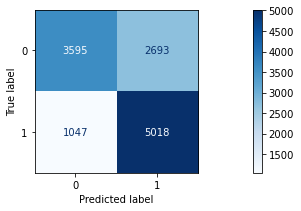

In [84]:
get_results(RS_xgb, 'RS XGBoost')

In [85]:
# Instantiate classifier
LDA=LinearDiscriminantAnalysis(solver='svd')
param_grid_LDA = {
    'n_components' : [1,2,3,4,5],
    'tol':[1e-4,1e-3],
}

# Instantiate Randomized Search
RS_LDA = RandomizedSearchCV(LDA, param_grid_LDA,cv=10, n_jobs= 3, scoring= 'f1', 
                            random_state=42)
# fit model
RS_LDA.fit(X_train, y_train)
RS_LDA.best_params_

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklea

{'tol': 0.0001, 'n_components': 1}

RS LDA Classification Report
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6288
           1       0.75      0.64      0.69      6065

    accuracy                           0.72     12353
   macro avg       0.73      0.72      0.72     12353
weighted avg       0.73      0.72      0.72     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


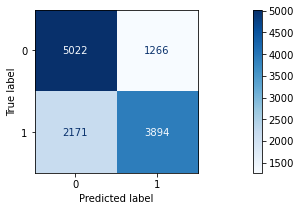

In [86]:
get_results(RS_LDA, 'RS LDA')

In [87]:
SGD = SGDClassifier()
param_grid_SGD = {
    'penalty':['l2', 'l1', 'elasticnet', 'None'],
    'tol':[1e-3,1e-4,1e-2],
    'max_iter':[500,750,1000,1250,1500],
    'alpha':[0.0001,0.0002]
}

# Instantiate Randomized Search
RS_SGD = RandomizedSearchCV(SGD, param_grid_SGD,cv=10, n_jobs= 3, scoring= 'f1', 
                            random_state=42)
# fit model
RS_SGD.fit(X_train, y_train)
RS_SGD.best_params_

{'tol': 0.0001, 'penalty': 'l1', 'max_iter': 1250, 'alpha': 0.0001}

RS SGD Classification Report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6288
           1       0.76      0.62      0.69      6065

    accuracy                           0.72     12353
   macro avg       0.73      0.72      0.72     12353
weighted avg       0.73      0.72      0.72     12353



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


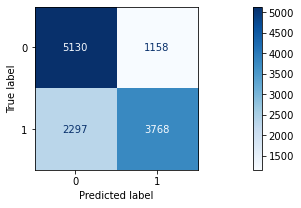

In [88]:
get_results(RS_SGD, 'RS SGD')

In [130]:
results = results.sort_values(by= ['False_Negative','F1_score'], 
                              ascending= True)
results

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
RS XGBoost,70.02,69.72,0.73,1047.0,5018.0
Tuned SVM,71.37,71.51,0.73,1309.0,4756.0
RS Decision Tree,72.13,72.50,0.72,1670.0,4395.0
Support Vector Machine,72.33,72.40,0.71,1937.0,4128.0
XGBoost,74.12,72.42,0.71,1957.0,4108.0
RS Random Forest,74.63,72.15,0.70,1959.0,4106.0
K-Nearest Neighbors,74.65,69.22,0.68,1966.0,4099.0
GS KNN,72.54,72.64,0.71,1979.0,4086.0
GS Logistic Regression,71.73,72.16,0.70,2105.0,3960.0
Logistic Regression,71.76,72.12,0.70,2110.0,3955.0


### ROC curve of top 3 models

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed 

Text(0, 0.5, 'True Positive Rate')

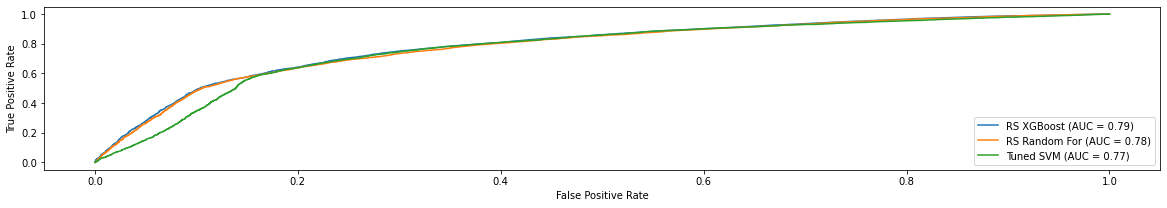

In [131]:
fig = plot_roc_curve(RS_xgb, X_test, y_test, name= 'RS XGBoost')
plot_roc_curve(RS_RF,X_test, y_test, ax = fig.ax_, name= 'RS Random For')
plot_roc_curve(svc,X_test, y_test, ax = fig.ax_, name= 'Tuned SVM')

# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Since we are looking at medical data, missing a diagnosis of cardiovascular disease could be deadly(False negative). But we can't be misdiagnosing too many people that don't have the disease(False positive) and telling them to get a bunch of expensive tests.

That is why looking at F1 score and putting it in the scoring paramter in the gridsearch is important .We  want a balance between False negative and False positive.

Best model with hyper parameter tuning is XGboost with ramdomized search since it has highest f1 score,lowest false negative, highest true positive and highest auc score.